Objectives:

1. Introduce the concept of swarm models in the context of Observational Network Dynamics (OND).
2. Implement a simple model of swarm behavior to study how agents self-organize based on local interactions.
3. Visualize the evolution of agent velocities and their final positions in the environment.

In swarm models, agents update their states (in this context, velocities) based on interactions with neighboring agents within a certain "vision range."

For simplicity, we consider a 2D environment where agents have positions and velocities. Agents adjust their velocities to match those of their neighbors within their vision range:

\[ v_i(t+1) = v_i(t) + \alpha \left( \frac{\sum_{j \in \text{neighbors}} v_j(t)}{|\text{neighbors}|} - v_i(t) \right) \]

Here, \( \alpha \) is the rate of velocity matching, and the sum is taken over neighboring agents within the vision range.

Here's the code to implement this simulation:


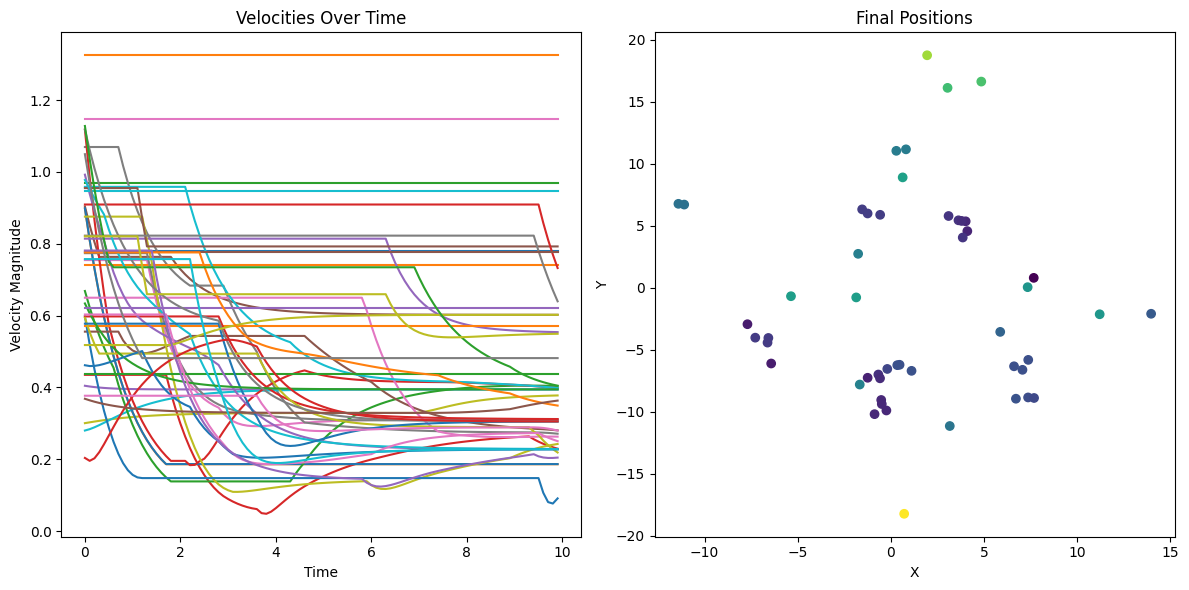

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Importing necessary libraries for the 'Swarm Models in OND' notebook
from scipy.spatial.distance import pdist, squareform

# Parameters for the swarm model
N_agents = 50  # Number of agents in the swarm
alpha_swarm = 0.1  # Rate of velocity matching
vision_range = 1.0  # Range within which agents can see each other

# Initial positions and velocities
positions = np.random.uniform(-10, 10, (N_agents, 2))
velocities = np.random.uniform(-1, 1, (N_agents, 2))

# Time parameters for simulation
dt_swarm = 0.1
total_time_swarm = 10.0
time_steps_swarm = int(total_time_swarm / dt_swarm)

# Store the positions and velocities at each time step
positions_over_time = np.zeros((time_steps_swarm, N_agents, 2))
velocities_over_time = np.zeros((time_steps_swarm, N_agents, 2))

# Initial state
positions_over_time[0, :, :] = positions
velocities_over_time[0, :, :] = velocities

# Function to update the velocities based on neighbors within vision range
def update_velocities(positions, velocities, alpha_swarm, vision_range):
    pairwise_distances = squareform(pdist(positions))
    neighbors = pairwise_distances < vision_range
    delta_velocities = np.dot(neighbors, velocities) / np.sum(neighbors, axis=1, keepdims=True) - velocities
    return velocities + alpha_swarm * delta_velocities

# Simulate the swarm dynamics over time
for t in range(1, time_steps_swarm):
    positions_t = positions_over_time[t-1, :, :]
    velocities_t = velocities_over_time[t-1, :, :]
    velocities_over_time[t, :, :] = update_velocities(positions_t, velocities_t, alpha_swarm, vision_range)
    positions_over_time[t, :, :] = positions_t + dt_swarm * velocities_over_time[t, :, :]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, total_time_swarm, dt_swarm), np.linalg.norm(velocities_over_time, axis=2))
plt.title('Velocities Over Time')
plt.xlabel('Time')
plt.ylabel('Velocity Magnitude')

plt.subplot(1, 2, 2)
plt.scatter(positions_over_time[-1, :, 0], positions_over_time[-1, :, 1], c=np.linalg.norm(velocities_over_time[-1, :, :], axis=1))
plt.title('Final Positions')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()


The plot on the left shows the magnitude of agent velocities over time, indicating how they change to reach a form of alignment. The plot on the right shows the final positions of the agents, color-coded by their velocity magnitude.

Would you like to proceed to the next notebook or discuss this one further?